<a href="https://colab.research.google.com/github/diego51alejo/Crime_Prediction/blob/master/Crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crime Prediction**

## Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder
)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/db'

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/db


In [4]:
df_del = pd.read_csv('Delitos_en_Bucaramanga.csv')
df_del.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170557,-73.135108,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


## Preprocessing

In [5]:
df_copy = df_del.copy(deep=True)

In [6]:
df_copy = df_copy.loc[:,[
 'LATITUD',
 'LONGITUD',
 'NOM_COMUNA',
 'ANO',
 'MES',
 'DIA',
 'DIA_SEMANA',
 'CONDUCTA',
 'GENERO',
 
]]
df_copy

,LATITUD,LONGITUD,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,CONDUCTA,GENERO
0,7.170557,-73.135108,14. Morrorico,2010,01. Enero,1,05. Viernes,LESIONES PERSONALES,MASCULINO
1,7.120645,-73.12605,05. García Rovira,2010,01. Enero,1,05. Viernes,LESIONES PERSONALES,MASCULINO
2,7.120645,-73.12605,05. García Rovira,2010,01. Enero,1,05. Viernes,LESIONES PERSONALES,MASCULINO
3,7.151359,-73.145705,03. San Francisco,2010,01. Enero,1,05. Viernes,LESIONES PERSONALES,MASCULINO
4,7.170557,-73.135108,04. Occidental,2010,01. Enero,1,05. Viernes,LESIONES PERSONALES,MASCULINO
...,...,...,...,...,...,...,...,...,...
260078,7.098447531,-73.10746901,16. Lagos del Cacique,2021,07. julio,22,04. Jueves,MECHERO/HORMIGUEO,NO REPORTA
260079,7.129577142,-73.1246566,03. San Francisco,2021,07. julio,27,02. Martes,MECHERO/HORMIGUEO,NO REPORTA
260080,7.12344346,-73.11691678,13. Oriental,2021,07. julio,28,03. Miércoles,SUPL. SERVICIOS TECNICOS,NO REPORTA
260081,7.134729719,-73.10952894,13. Oriental,2021,07. julio,9,05. Viernes,HALADO,MASCULINO


In [7]:
df_copy.loc[:,['NOM_COMUNA']] = df_copy['NOM_COMUNA'].str[4:]
df_copy['MES'] = df_copy['MES'].str[4:]
df_copy['DIA_SEMANA'] = df_copy['DIA_SEMANA'].str[4:]

In [8]:
df_copy['MES']=df_copy['MES'].str.upper()
df_copy['DIA_SEMANA']=df_copy['DIA_SEMANA'].str.upper()
df_copy['GENERO']=df_copy['GENERO'].str.upper()
df_copy['NOM_COMUNA']=df_copy['NOM_COMUNA'].str.upper()
df_copy['CONDUCTA']=df_copy['CONDUCTA'].str.upper()


In [9]:
idx = df_copy['ANO'] > 2015

df_copy = df_copy[idx]
df_copy

,LATITUD,LONGITUD,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,CONDUCTA,GENERO
991,NaN,NaN,CENTRO,2016,ABRIL,25,LUNES,ACOSO SEXUAL,FEMENINO
61727,7.121479,-73.132564,OCCIDENTAL,2016,ENERO,1,VIERNES,LESIONES PERSONALES,MASCULINO
61776,7.142748,-73.135628,NOR ORIENTAL,2016,ENERO,1,VIERNES,LESIONES PERSONALES,FEMENINO
61777,7.094155,-73.125338,SUR OCCIDENTE,2016,ENERO,1,VIERNES,LESIONES PERSONALES,FEMENINO
61778,7.155465,-73.128444,NOR ORIENTAL,2016,ENERO,1,VIERNES,LESIONES PERSONALES,MASCULINO
...,...,...,...,...,...,...,...,...,...
260078,7.098447531,-73.10746901,LAGOS DEL CACIQUE,2021,JULIO,22,JUEVES,MECHERO/HORMIGUEO,NO REPORTA
260079,7.129577142,-73.1246566,SAN FRANCISCO,2021,JULIO,27,MARTES,MECHERO/HORMIGUEO,NO REPORTA
260080,7.12344346,-73.11691678,ORIENTAL,2021,JULIO,28,MIÉRCOLES,SUPL. SERVICIOS TECNICOS,NO REPORTA
260081,7.134729719,-73.10952894,ORIENTAL,2021,JULIO,9,VIERNES,HALADO,MASCULINO


In [10]:
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


LATITUD       0
LONGITUD      0
NOM_COMUNA    0
ANO           0
MES           0
DIA           0
DIA_SEMANA    0
CONDUCTA      0
GENERO        0
dtype: int64

In [11]:
df_copy['LATITUD'] = df_copy['LATITUD'].apply(lambda x: str(x))
df_copy['LONGITUD'] = df_copy['LONGITUD'].apply(lambda x: str(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_copy['LATITUD'] = df_copy['LATITUD'].str.replace(',','')
df_copy['LATITUD'] = df_copy['LATITUD'].str.replace('.','')
df_copy['LONGITUD'] = df_copy['LONGITUD'].str.replace(',','')
df_copy['LONGITUD'] = df_copy['LONGITUD'].str.replace('.','')
df_copy['LONGITUD']= df_copy['LONGITUD'].str[:3]+'.'+df_copy['LONGITUD'].str[3::]
df_copy['LATITUD']=df_copy['LATITUD'].str[:1]+'.'+df_copy['LATITUD'].str[1::]
df_copy['LATITUD'] = df_copy['LATITUD'].apply(lambda x: float(x))
df_copy['LONGITUD'] = df_copy['LONGITUD'].apply(lambda x: float(x))

In [ ]:
index_drop =  df_copy['CONDUCTA'].str.contains('HURTO')
df_new = df_copy.loc[index_drop]
df_new['ones'] = 1

In [ ]:
df_new['CONDUCTA'] = df_new['CONDUCTA'].str.replace('HURTO A ENTIDADES COMERCIALES','HURTO A COMERCIO')

In [ ]:
df_new['CONDUCTA'] = df_new['CONDUCTA'].str.replace('HURTO A RESIDENCIAS|HURTO A RESIDENCIA','HURTO RESIDENCIAS')

In [27]:
df_new['CONDUCTA'].unique()

array(['HURTO A PERSONAS', 'HURTO A MOTOCICLETAS', 'HURTO RESIDENCIAS',
       'HURTO A COMERCIO', 'HURTO A AUTOMOTORES',
       'HURTO A ENTIDADES FINANCIERAS', 'HURTO A PIRATERÍA TERRESTRE',
       'HURTO ABIGEATO', 'HURTO A CELULARES', 'HURTO DE AUTOPARTES',
       'HURTO DE BICICLETAS'], dtype=object)

## Exploratory Analysis


### 2016-2020

In [30]:
tabla_conducta = df_new.groupby(['CONDUCTA'])['ones'].count()
tabla_conducta

CONDUCTA
HURTO A AUTOMOTORES                136
HURTO A CELULARES                  920
HURTO A COMERCIO                  9656
HURTO A ENTIDADES FINANCIERAS       18
HURTO A MOTOCICLETAS              3360
HURTO A PERSONAS                 44334
HURTO A PIRATERÍA TERRESTRE          4
HURTO ABIGEATO                      12
HURTO DE AUTOPARTES                 22
HURTO DE BICICLETAS                 32
HURTO RESIDENCIAS                 4586
Name: ones, dtype: int64

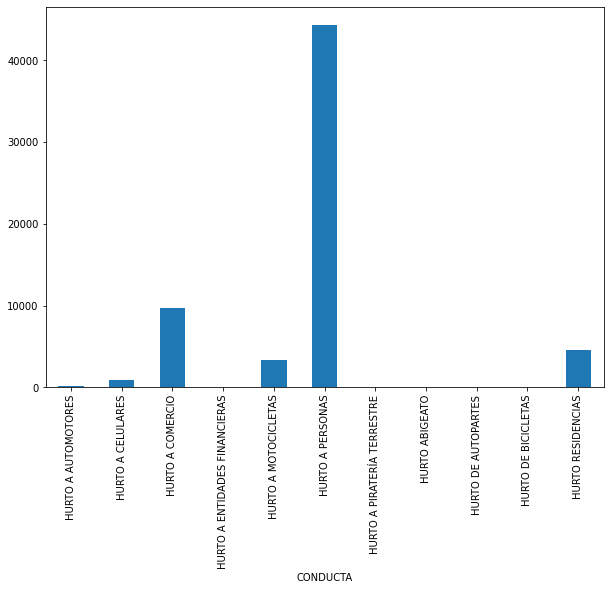

In [21]:
tabla_conducta.plot(kind='bar', figsize=(10,7))

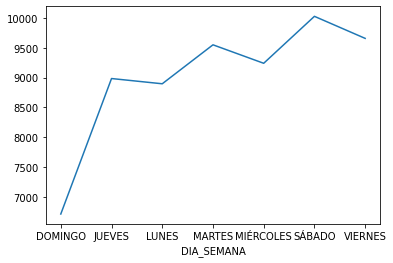

In [31]:
df_new.groupby(['DIA_SEMANA'])['ones'].count().plot()

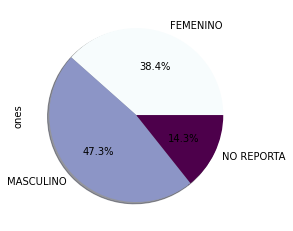

In [32]:
df_new.groupby(['GENERO'])['ones'].count().plot.pie(autopct="%.1f%%", cmap='BuPu', shadow=True)

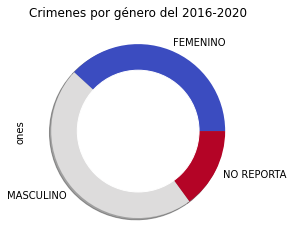

In [72]:
circle = plt.Circle((0,0), 0.7, color='white')
fig = plt.figure()



df_new.groupby(['GENERO'])['ones'].count().plot.pie(cmap='coolwarm', shadow=True).set_title('Crimenes por género del 2016-2020')
p = plt.gcf()

p.gca().add_artist(circle)
plt.show()

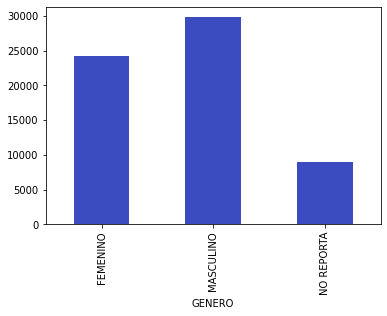

In [34]:
df_new.groupby(['GENERO'])['ones'].count().plot.bar(cmap='coolwarm')

### 2019

In [39]:
df_new = df_new[(df_new['LONGITUD'] >-75) & (df_new['LONGITUD'] <-71) & (df_new['LATITUD'] < 9) & (df_new['LATITUD'] > 6)]

In [40]:
df_2019 = df_new[df_new['ANO'] == 2019]

In [37]:
import plotly.express as px
token_map_plot='pk.eyJ1IjoiZGllZ281MWFsZWpvIiwiYSI6ImNrd3Rid2xtOTFmM2kybnM2bWczeWdobTUifQ.sZrX27F8jDgXL_eUYA6SVw'
px.set_mapbox_access_token(token_map_plot)

In [43]:
px.scatter_mapbox(df_2019,lat='LATITUD', lon='LONGITUD', color='CONDUCTA', color_continuous_scale=px.colors.cyclical.IceFire, zoom=12)

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR COMUNA')

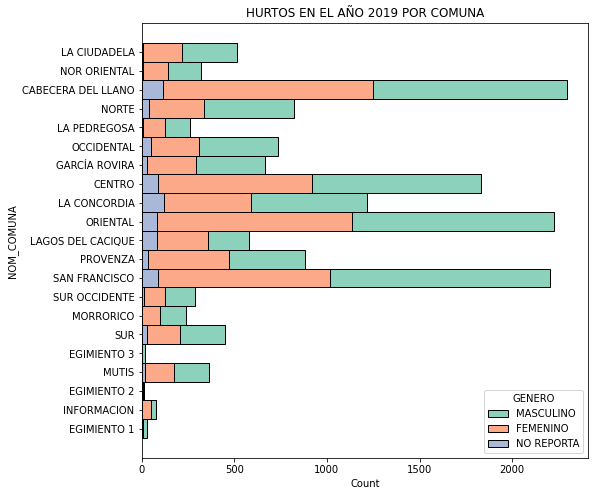

In [70]:
plt.figure(figsize=(8,8))
sns.histplot(data=df_2019, y='NOM_COMUNA', hue='GENERO', multiple='stack', palette='Set2').set_title('HURTOS EN EL AÑO 2019 POR COMUNA')

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR DÍA DE LA SEMANA')

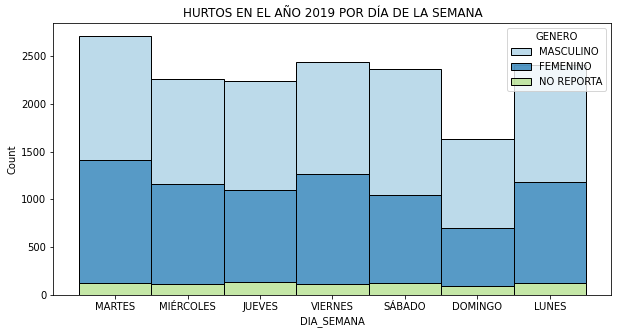

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_2019, x='DIA_SEMANA', hue='GENERO', multiple='stack', palette='Paired').set_title('HURTOS EN EL AÑO 2019 POR DÍA DE LA SEMANA')

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR AÑO')

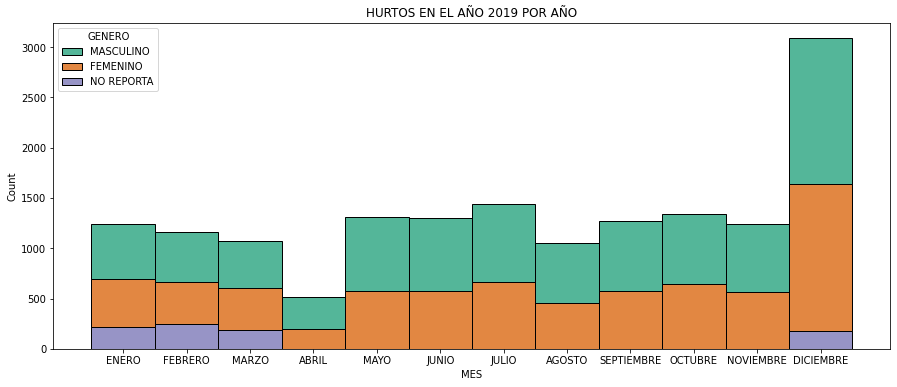

In [69]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_2019, x='MES', multiple='stack',hue='GENERO', palette='Dark2').set_title('HURTOS EN EL AÑO 2019 POR AÑO')

## Train and Evaluate model

### Preprocessing 2

In [ ]:
df_2019['GENERO_T'] = OrdinalEncoder().fit_transform(df_2019[['GENERO']])

In [ ]:
df_2019['CONDUCTA_T'] = OrdinalEncoder().fit_transform(df_2019[['CONDUCTA']])

In [ ]:
df_2019['MES_T'] = OrdinalEncoder().fit_transform(df_2019[['MES']])

In [ ]:
df_2019['NOM_COMUNA_T'] = OrdinalEncoder().fit_transform(df_2019[['NOM_COMUNA']])
df_2019['DIA_SEMANA_T'] = OrdinalEncoder().fit_transform(df_2019[['DIA_SEMANA']])

In [54]:
df = df_2019.loc[:,
    ['LATITUD',
 'LONGITUD',
 'ANO',
 'DIA',
 'GENERO_T',
 'CONDUCTA_T',
 'MES_T',
 'DIA_SEMANA_T']
]

In [55]:
X = df.drop(['CONDUCTA_T'], axis=1)
y = df['CONDUCTA_T']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.35)

### Model and Evaluation

In [56]:
reg = RandomForestClassifier()


parametros = {
    'n_estimators': range(100,105),
    'criterion': ['gini', 'entropy'],
    
}

rand_est = RandomizedSearchCV(reg, parametros, n_iter=5, scoring='accuracy').fit(X_train,y_train)

rand_est.best_estimator_

RandomForestClassifier(criterion='entropy')

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
predictor = RandomForestClassifier(criterion='entropy', n_estimators=400).fit(X_train,y_train)
scores = cross_val_score(predictor, X_train, y_train, cv=5)
scores

array([0.91314779, 0.91650672, 0.9193858 , 0.91554702, 0.91794626])

In [59]:
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
estimadores = {
    'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy'),
    'SVM': svm.SVC(),
    'SGD': SGDClassifier(loss='log', penalty='l2', max_iter=8),
    'KNN': KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(),
    'Gradiend Boosting':GradientBoostingClassifier(n_estimators=200)
}

In [61]:
#Quita las warnings
import warnings
warnings.simplefilter("ignore")

In [66]:
for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)
    print('*'*20)
    print(name)
    print('Accuracy Score ', accuracy_score(y_test, predictions) )

********************
Decision Tree
Accuracy Score  0.9125089094796864
********************
SVM
Accuracy Score  0.7742337847469708
********************
SGD
Accuracy Score  0.7742337847469708
********************
KNN
Accuracy Score  0.7863506771204561
********************
Logistic Regression
Accuracy Score  0.7742337847469708
********************
Gradiend Boosting
Accuracy Score  0.8451532430506058
